# Song classification and recommendation

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_train = pd.read_csv("../data/raw/spotify_dataset_train.csv")
df_test = pd.read_csv("../data/raw/spotify_dataset_test.csv")

## General info

In [23]:
df_train.info()# attention mode est aussi boolean

<class 'pandas.DataFrame'>
RangeIndex: 25492 entries, 0 to 25491
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      25492 non-null  str    
 1   explicit          25492 non-null  bool   
 2   popularity        25492 non-null  int64  
 3   danceability      25492 non-null  float64
 4   energy            25492 non-null  float64
 5   key               25492 non-null  int64  
 6   loudness          25492 non-null  float64
 7   mode              25492 non-null  int64  
 8   speechiness       25492 non-null  float64
 9   acousticness      25492 non-null  float64
 10  instrumentalness  25492 non-null  float64
 11  liveness          25492 non-null  float64
 12  valence           25492 non-null  float64
 13  tempo             25492 non-null  float64
 14  duration_ms       25492 non-null  int64  
 15  time_signature    25492 non-null  int64  
 16  genre             25492 non-null  str    
dtypes: b

In [24]:
df_train.shape

(25492, 17)

In [25]:
df_train.head()

,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,2015-06-23,False,38,0.509,0.8720,2,-5.170,1,0.0547,0.0396,0.000015,0.3310,0.4860,95.969,194375,4,country
1,2021-11-12,False,58,0.182,0.0377,11,-33.748,0,0.0391,0.9870,0.957000,0.0804,0.0923,100.482,241804,4,classical
2,2013-06-21,False,36,0.550,0.9410,0,-3.128,0,0.0849,0.0182,0.003750,0.3120,0.3510,145.006,260276,4,rap
3,2012-09-04,False,0,0.569,0.7190,6,-8.399,0,0.0663,0.8670,0.941000,0.1760,0.6430,145.118,165200,4,blues
4,2008,False,0,0.631,0.6610,8,-5.694,1,0.0558,0.0146,0.720000,0.3650,0.3300,130.004,245933,4,dance


## Stats

In [26]:
df_train.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,25492.000000,2.549200e+04,25492.000000
mean,31.185784,0.600785,0.666671,5.319630,-7.827989,0.617841,0.098590,0.247458,0.121762,0.194426,0.517368,122.020427,2.357300e+05,3.949004
std,26.647985,0.167052,0.223217,3.577066,4.190793,0.485925,0.100955,0.298900,0.264749,0.160047,0.252768,28.000996,9.605836e+04,0.313024
min,0.000000,0.000000,0.000020,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.008290,0.000000,0.000000,1.344000e+04,0.000000
25%,0.000000,0.494000,0.526000,2.000000,-9.618250,0.000000,0.038000,0.012900,0.000000,0.093475,0.318000,99.996000,1.833298e+05,4.000000
50%,33.000000,0.613000,0.700000,5.000000,-6.944500,1.000000,0.054400,0.098400,0.000099,0.129000,0.518000,123.130000,2.179200e+05,4.000000
75%,54.000000,0.723000,0.846000,8.000000,-5.047750,1.000000,0.111000,0.415000,0.031700,0.254000,0.721000,139.936000,2.656698e+05,4.000000
max,98.000000,0.988000,1.000000,11.000000,1.869000,1.000000,0.934000,0.996000,0.989000,0.988000,0.988000,244.613000,2.516987e+06,5.000000


In [27]:
df_train.isna().sum()

release_date        0
explicit            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

In [28]:
df_train.nunique()

release_date         5597
explicit                2
popularity             99
danceability          917
energy               1265
key                    12
loudness            11339
mode                    2
speechiness          1279
acousticness         3890
instrumentalness     4746
liveness             1605
valence              1416
tempo               19155
duration_ms         18616
time_signature          5
genre                  22
dtype: int64

C:\Users\alfar\AppData\Local\Temp\ipykernel_19244\727536109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=df_counts, palette='viridis')


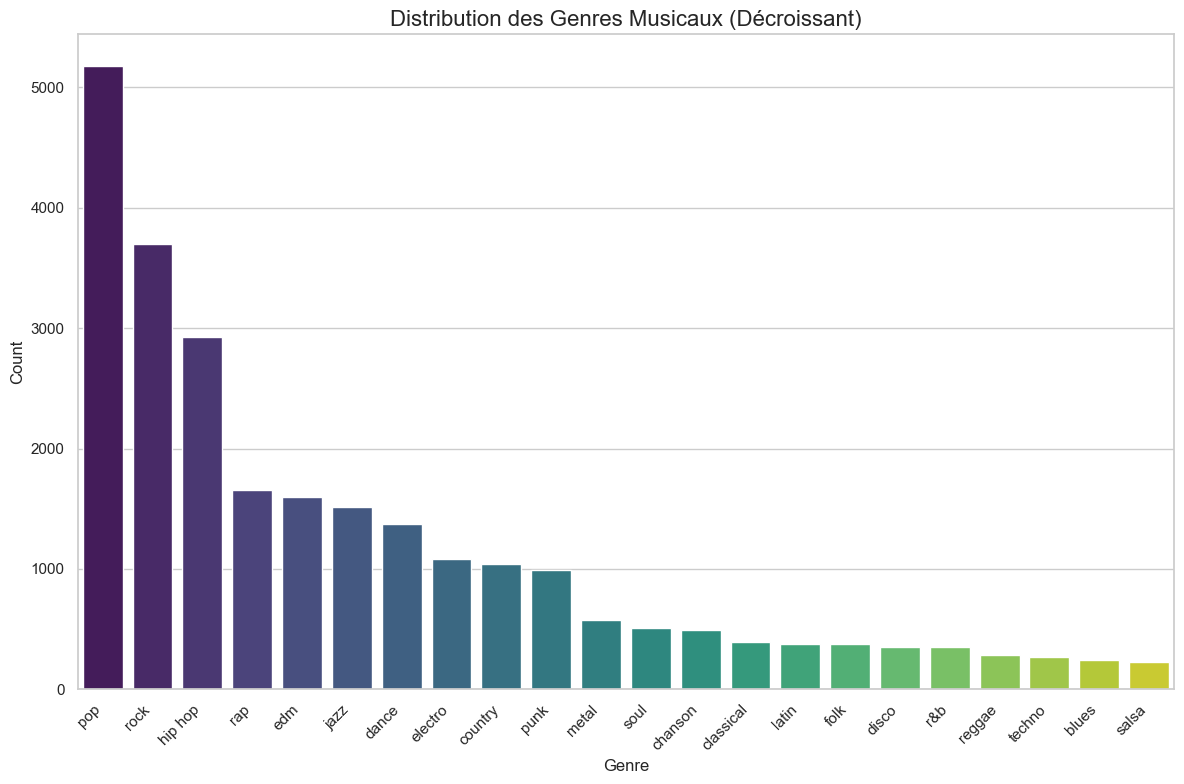

In [29]:

df_counts = df_train['genre'].value_counts().reset_index()
df_counts.columns = ['Genre', 'Count']

# Configuration et tracé
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x='Genre', y='Count', data=df_counts, palette='viridis')

plt.title('Distribution des Genres Musicaux (Décroissant)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

les classes sont déséquilibrées aevc une sureprésentation du pop rock et hip hop 

In [36]:
from sklearn.preprocessing import LabelEncoder

#preprocessing 
df_train_copy = df_train.copy() # pour eviter les pb

le = LabelEncoder()
df_train_copy['genre']=le.fit_transform(df_train_copy['genre'])


#pour les dates, on cosidere leurs écarts par rapport a la premiere date. la premiere est considéré a 0.

df_train_copy['release_date'] = pd.to_datetime(df_train_copy['release_date'],format='mixed')
min_date = df_train_copy['release_date'].min()
df_train_copy['days_since_1900'] = (df_train_copy['release_date'] - min_date).dt.days
df_train_copy['days_since_1900'].sort_values()



16719        0
22636     8400
24613     8400
11288     8400
15514     9131
         ...  
10436    44570
24232    44573
16511    44573
19383    44573
22166    44573
Name: days_since_1900, Length: 25492, dtype: int64

In [ ]:
#preprocessing 
df_train_copy = df_train.copy() # pour eviter les pb



#pour les dates, on cosidere leurs écarts par rapport a la premiere date. la premiere est considéré a 0.

df_train_copy['release_date'] = pd.to_datetime(df_train_copy['release_date'],format='mixed')
min_date = df_train_copy['release_date'].min()
df_train_copy['days_since_1900'] = (df_train_copy['release_date'] - min_date).dt.days
df_train_copy['days_since_1900'].sort_values()


In [34]:

FEATURES = list( df_train_copy.columns[1:] )# retirer la date pour simplifier
print(FEATURES)
df_train_clean = df_train_copy[FEATURES]
df_train_clean['explicit'] = df_train_clean['explicit'].astype(int) 
dummy_df = pd.get_dummies(df_train_clean)
df_train_clean.head()
df_train_clean.to_csv("../data/preprocessed/spotify_dataset_train.csv")


['explicit', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre', 'days_since_1900']


,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,days_since_1900
0,0,38,0.509,0.8720,2,-5.170,1,0.0547,0.039600,0.000015,0.3310,0.4860,95.969,194375,4,3,42176
1,0,58,0.182,0.0377,11,-33.748,0,0.0391,0.987000,0.957000,0.0804,0.0923,100.482,241804,4,2,44510
2,0,36,0.550,0.9410,0,-3.128,0,0.0849,0.018200,0.003750,0.3120,0.3510,145.006,260276,4,16,41444
3,0,0,0.569,0.7190,6,-8.399,0,0.0663,0.867000,0.941000,0.1760,0.6430,145.118,165200,4,0,41154
4,0,0,0.631,0.6610,8,-5.694,1,0.0558,0.014600,0.720000,0.3650,0.3300,130.004,245933,4,4,39446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25487,0,30,0.553,0.6990,2,-4.403,1,0.0572,0.699000,0.000004,0.0996,0.2260,147.081,192253,4,6,42746
25488,0,8,0.430,0.9880,0,-4.442,0,0.1580,0.000043,0.006330,0.3580,0.1220,150.000,194576,4,12,44349
25489,0,71,0.504,0.6550,0,-8.644,0,0.0542,0.604000,0.001930,0.3640,0.2620,99.982,264066,4,13,42935
25490,0,27,0.427,0.8800,2,-5.444,1,0.0494,0.002990,0.000002,0.2250,0.8560,159.340,102533,4,18,28579


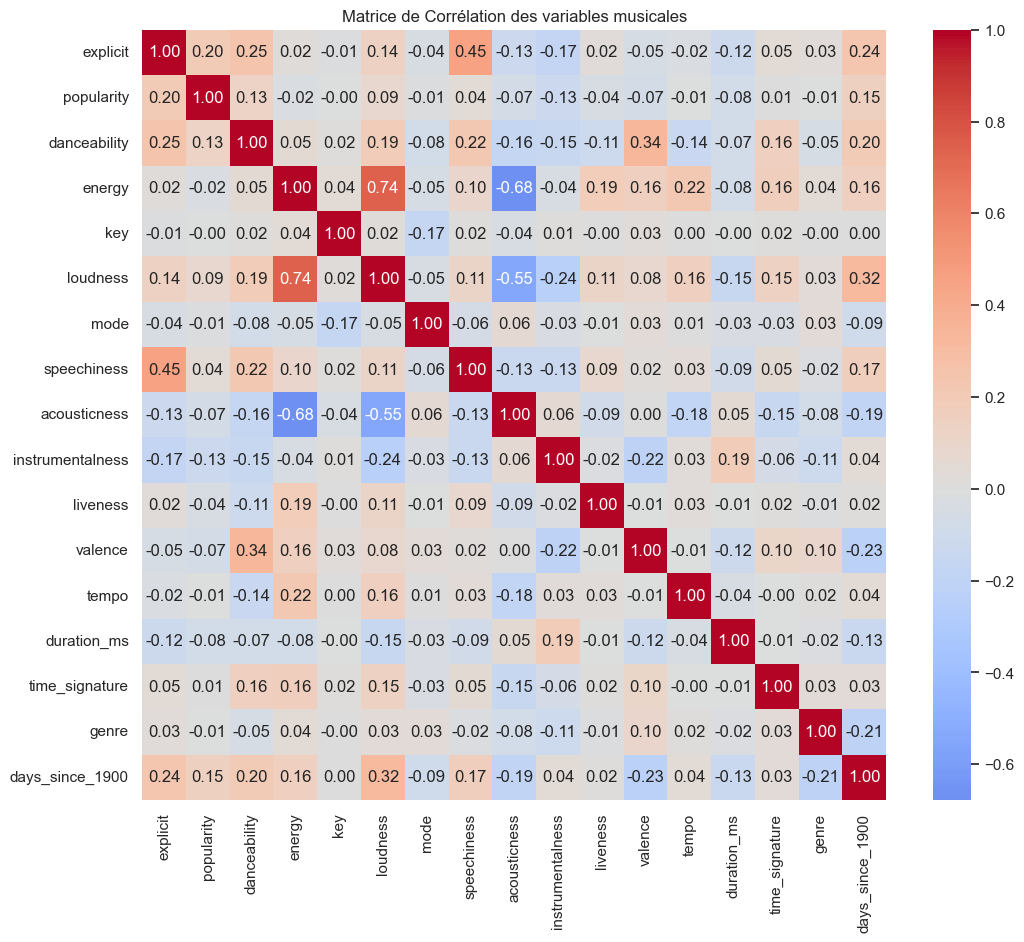

In [15]:
plt.figure(figsize=(12, 10))

sns.heatmap(df_train_clean.corr(), 
            annot=True,      
            fmt=".2f",      
            cmap='coolwarm', 
            center=0)       

plt.title("Matrice de Corrélation des variables musicales")
plt.show()